# Handout 8 Iris Data with k-Means and Single Linkage Clustering

The iris flower data set is a well-known if not especially interesting data set. The
data was collected by Edgar Anderson "quantify the morphologic variation of Iris flowers of three related species." (Wikipedia) Ronald Fisher developed a method for
analyzing the data called linear discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). For each sample, four features were measured:
the length and the width of the sepals and petals, in centimeters. A sepal 
is the green casing that protects a flower bud before it blooms. 

To get started, download the following two files from Canvas:

* *iris.data.csv* containing the data set

* *iris_pandas.py* containing code for reading and organizing the data

After downloading the first, run the second. The second uses pandas to read the .csv file and creates several two-column numpy arrays. The columns are widths or lengths
of the petals or sepals and the rows correspond to samples. The first 50 rows
are Iris setosa, the second 50 rows are Iris virginica, and the last 50 rows 
are Iris versicolor for a total of 150 rows.

In [16]:
import pandas as pd
import numpy as np

In [17]:
path = "iris.data.csv"

iris_df = pd.read_csv(path, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

In [18]:
sepal_length_array = np.array(iris_df["Sepal Length"])
sepal_width_array = np.array(iris_df["Sepal Width"])

petal_length_array = np.array(iris_df["Petal Length"])
petal_width_array = np.array(iris_df["Petal Width"])

sepal_array = np.array(iris_df[iris_df.columns[0:2]])
petal_array = np.array(iris_df[iris_df.columns[2:4]])

length_array = np.array(iris_df[["Sepal Length","Petal Length"]])
width_array = np.array(iris_df[["Sepal Width","Petal Width"]])

In [19]:
species = sepal_length_array = np.array(iris_df["Species"])

species_color = np.zeros(150,dtype = int)

species_color[species == 'Iris-setosa'] = 0
species_color[species == 'Iris-versicolor'] = 1
species_color[species == 'Iris-virginica'] =  2

### Part 1 k-Means Clustering

Download *cluster_k-means_iris.py* This is a version of the intuitive k-means
algorithm. In order to track the species labels, which do not correspond to 
cluster labels as the algorithim iterates, the points corresponding to different
species are plotted using different marker styles. 

**Exploration 1**

Apply k-means clustering with $k = 3$ to the different combinations of choices
of the two columns, that is, of petal length, petal width, sepal length, and sepal
width. For the different combinations, does 3-means perfectly identify the three
species? If not, briefly describe how it fails. 

3-means gets rather close to perfectly identifying the lengths of the three species. It does a good job from separating the first 'blue' (Iris Setosa) group from the other 'red' (Iris Virginica) and 'green' (Iris Versicolor) groups. However, there is a small amount of overlap between the 'red' and 'green' groups. There are only a handful of obersvations that do not match up so that the 3-means would perfectly separate the groups. 

The story is largely similar for identifying the petals of the three species. 3-means gets rather close again to a perfect identification. Like before, it is able to perfectly identify the 'blue' (Iris Setosa) group from the other two 'red' and 'green' groups. Again, there is a slight overlap between these latter two groups. This overlap is smaller than that of the overlap from the lengths of the three species.

The same also holds for identifying the sepals of the three species. Again, 3-means perfectly isolates the 'blue' (Iris Setosa) group from the 'red' (Iris Virginica) and 'green' (Iris Versicolor) groups. The overlap between the 'red' and 'green' groups is the worst for this plot than the other two. There is no clear, easy to interpret pattern for the differences between these two groups, leading to a large overlap.

### Part 2 Single Linkage Clustering

Here we'll use the scipy function *scipy.cluster.hierarchy.linkage* which is
described here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In single linkage clustering, the distance between two clusters is the 
minimum distance between a point in the first cluster and a point in the
second cluster. The algorithm produces a nested sequence of
clusters as follows:

* Step 0: Each point is its own cluster

* Step 1: The two closest clusters (using the above definition of distance between
clusters) are joined to form a cluster. 

Repeat Step 1 until all the points belong to the same cluster. 

The interesting aspects of this algorithm are how the clustering process
is represented symbolically and graphically.

We'll demonstate these with a simple example using $n = 11$ data points.
   

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
data = np.array([[0.1,   2.5],
              [1.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   1.3]])

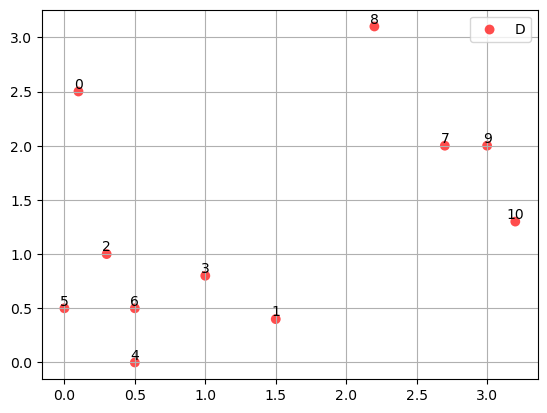

In [22]:
fig, ax = plt.subplots()

ax.scatter(data[:,0],data[:,1],s=50, c='r', marker = 'o',
              alpha=0.7, edgecolors='none')
ax.legend('Data')
ax.grid(True)
# add labels to all points
for j in range(11):
    plt.text(data[j,0],data[j,1], j, va='bottom', ha='center')
plt.show()

We observe two clear clusters.

Let's apply the *linkage* function. The output *Z* contains the nested
clustering data:

In [23]:
Z = linkage(data, 'single')
Z

array([[ 7.        ,  9.        ,  0.3       ,  2.        ],
       [ 4.        ,  6.        ,  0.5       ,  2.        ],
       [ 5.        , 12.        ,  0.5       ,  3.        ],
       [ 2.        , 13.        ,  0.53851648,  4.        ],
       [ 3.        , 14.        ,  0.58309519,  5.        ],
       [ 1.        , 15.        ,  0.64031242,  6.        ],
       [10.        , 11.        ,  0.72801099,  3.        ],
       [ 8.        , 17.        ,  1.2083046 ,  4.        ],
       [ 0.        , 16.        ,  1.5132746 ,  7.        ],
       [18.        , 19.        ,  1.92353841, 11.        ]])

$Z$ is by 4 x (n-1) = 4 x 10 matrix. Notice that if we start with $n$ data points,
joining clusters $n-1$ times will necessarily merge all the points into a single
cluster.

* The first two columns of $Z$ are cluster numbers. The $i$th row of $Z$
represents the joining of clusters with indices $Z[i, 0]$ and $Z[i, 1]$ 
forming cluster $n + i-1$

* A cluster with an index less than or equal to $n$ corresponds to one of the 
data points.

* The distance between clusters $Z[i, 0]$ and $Z[i, 1]$ is given by $Z[i, 2]$. 

* The fourth value $Z[i, 3]$ is the number of points in the newly formed cluster.

We can represent this graphically by a dendrogram:

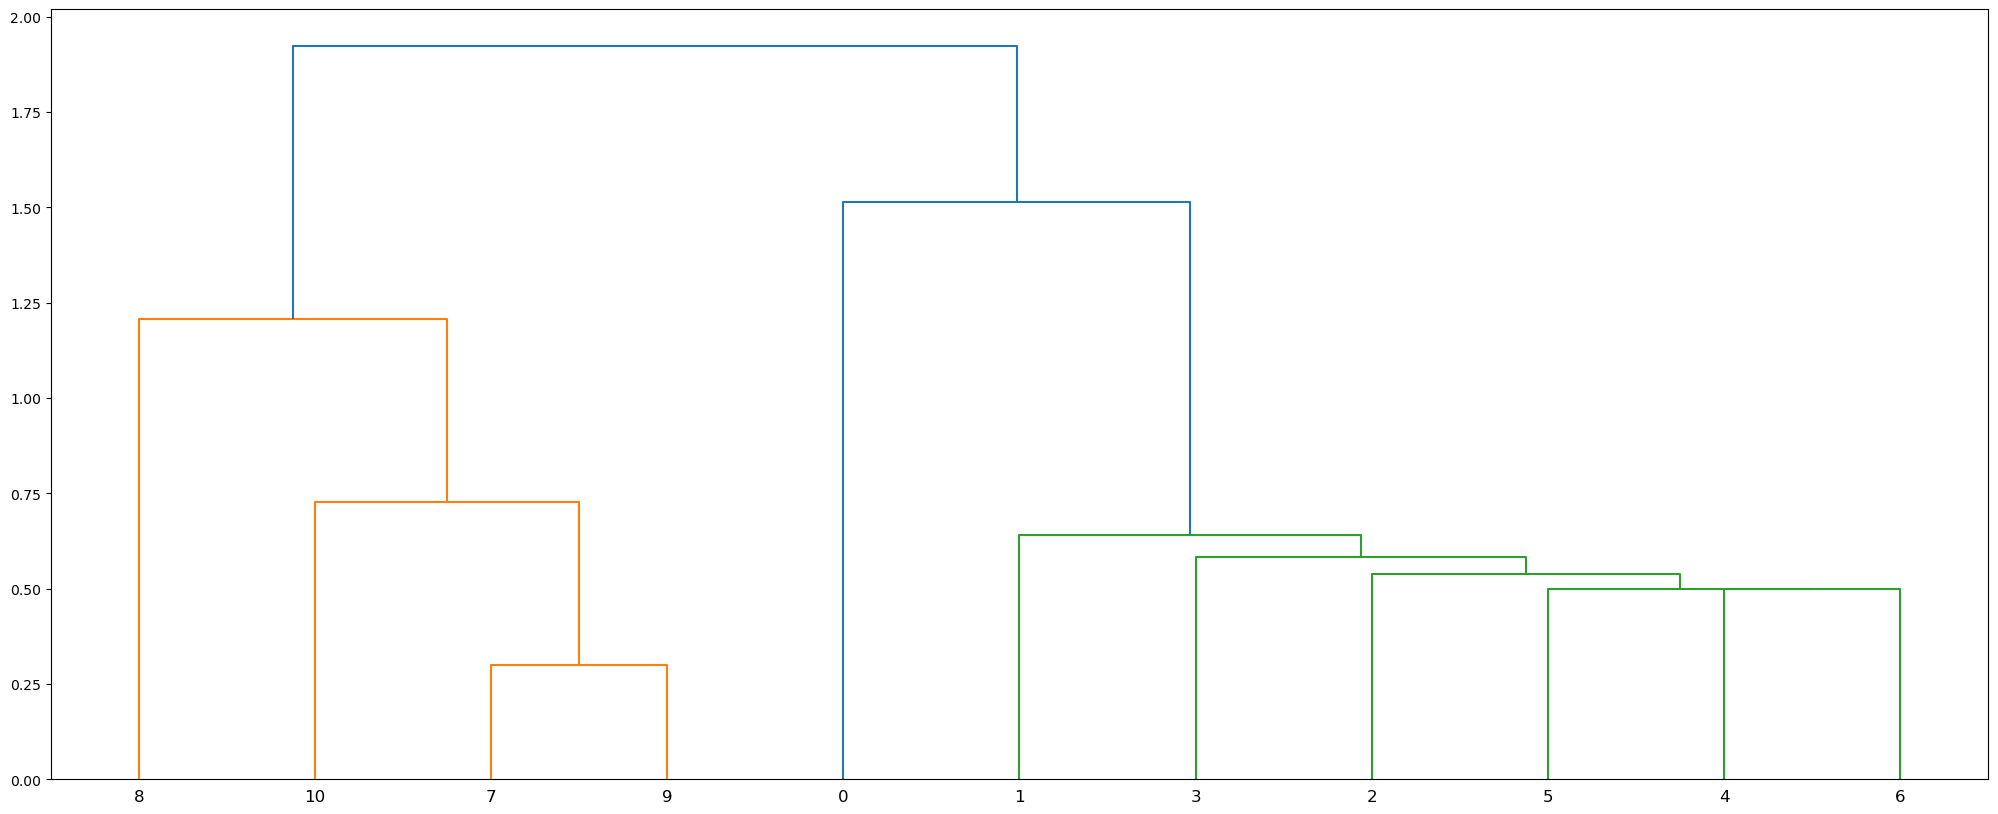

In [24]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

***Exploration 2***

Apply single linkage clustering to the Iris data set and plot the corresponding dendrogram. Do the dendrograms
reflect the clustering you observed using k-means clustering? Explain your answers. 


### Length_Array

In [25]:
Z = linkage(length_array, 'single')

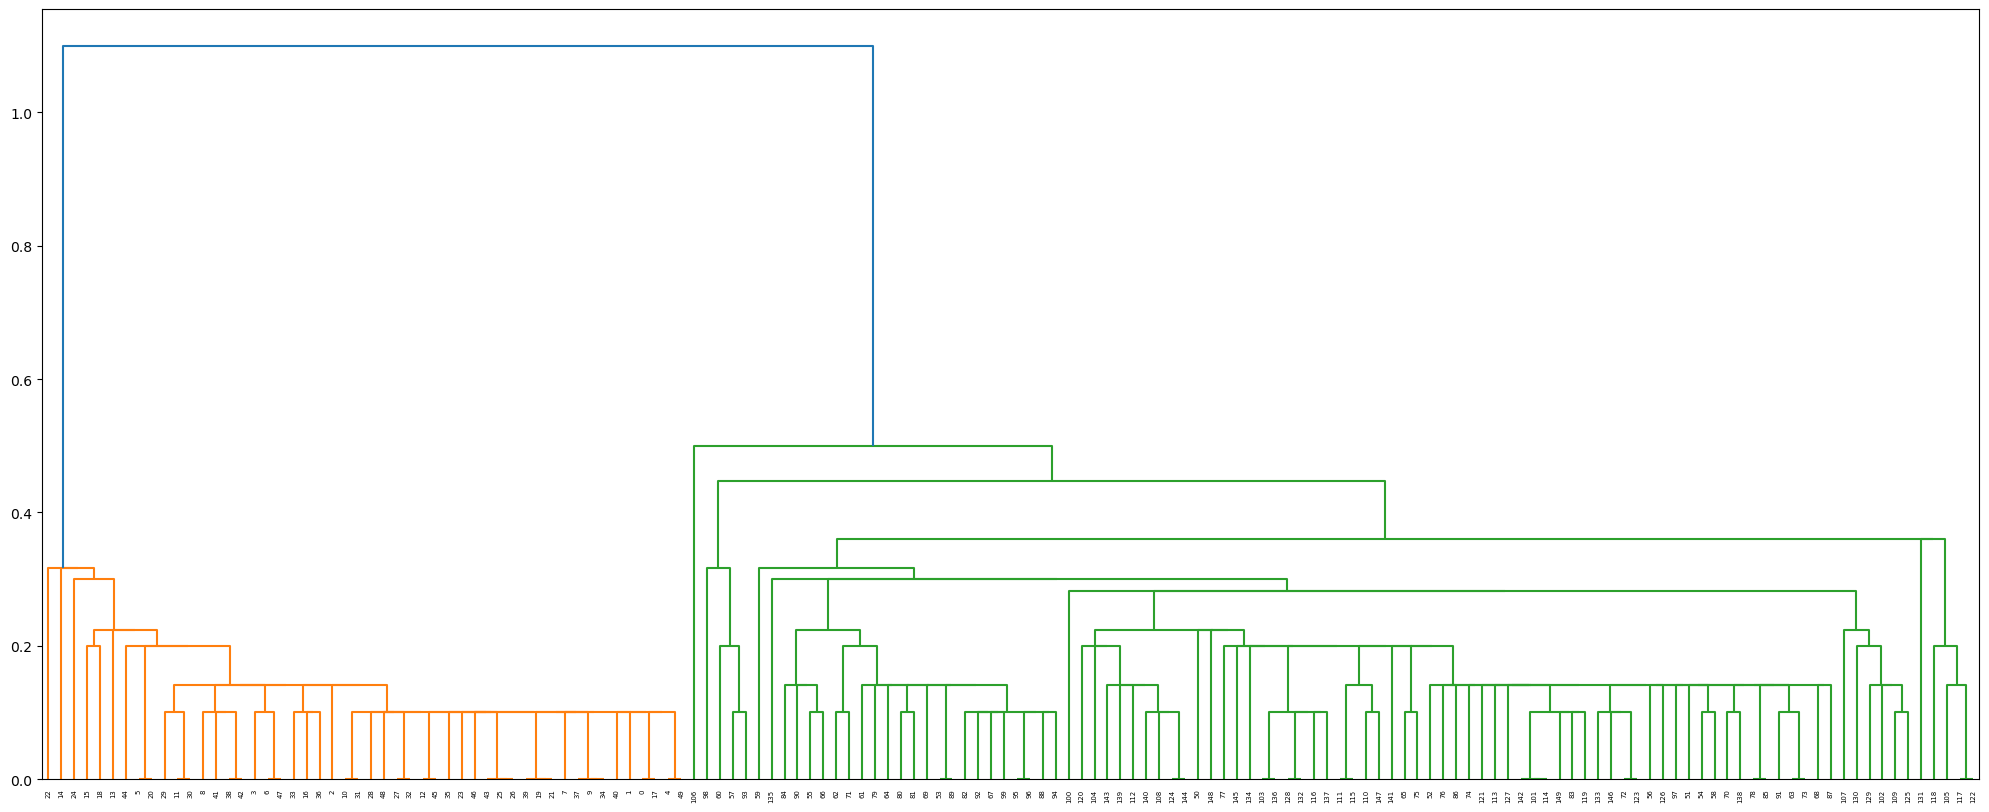

In [26]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Petal_Array

In [27]:
Z = linkage(petal_array, 'single')

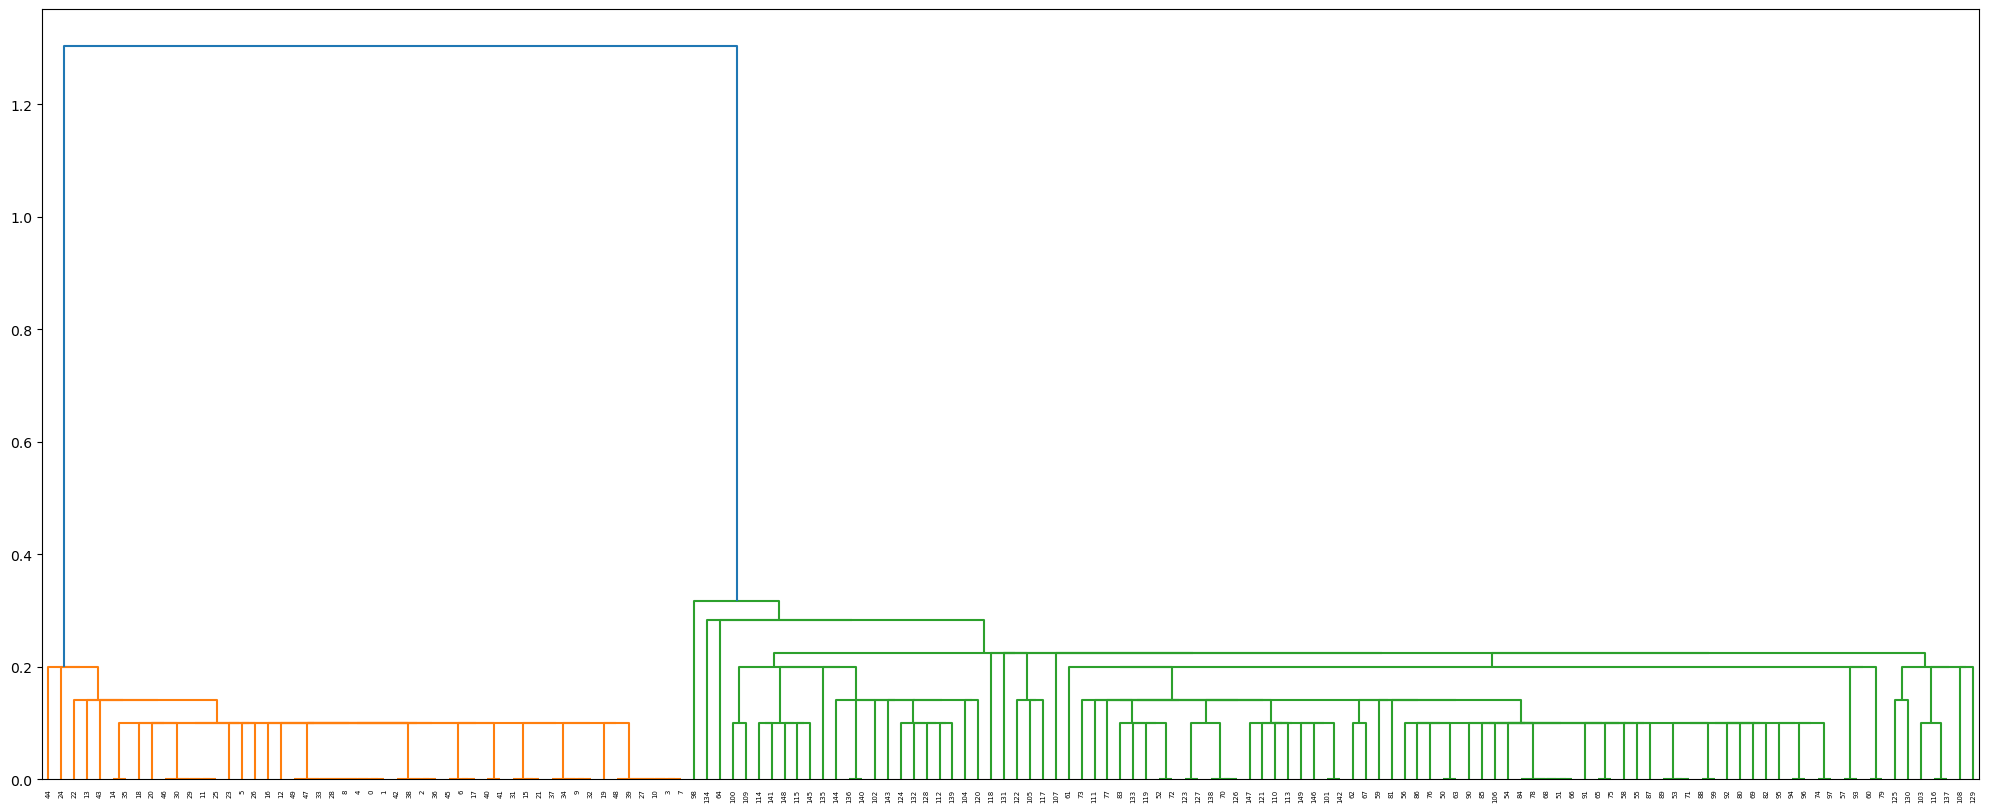

In [28]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Sepal_Array

In [29]:
Z = linkage(sepal_array, 'single')

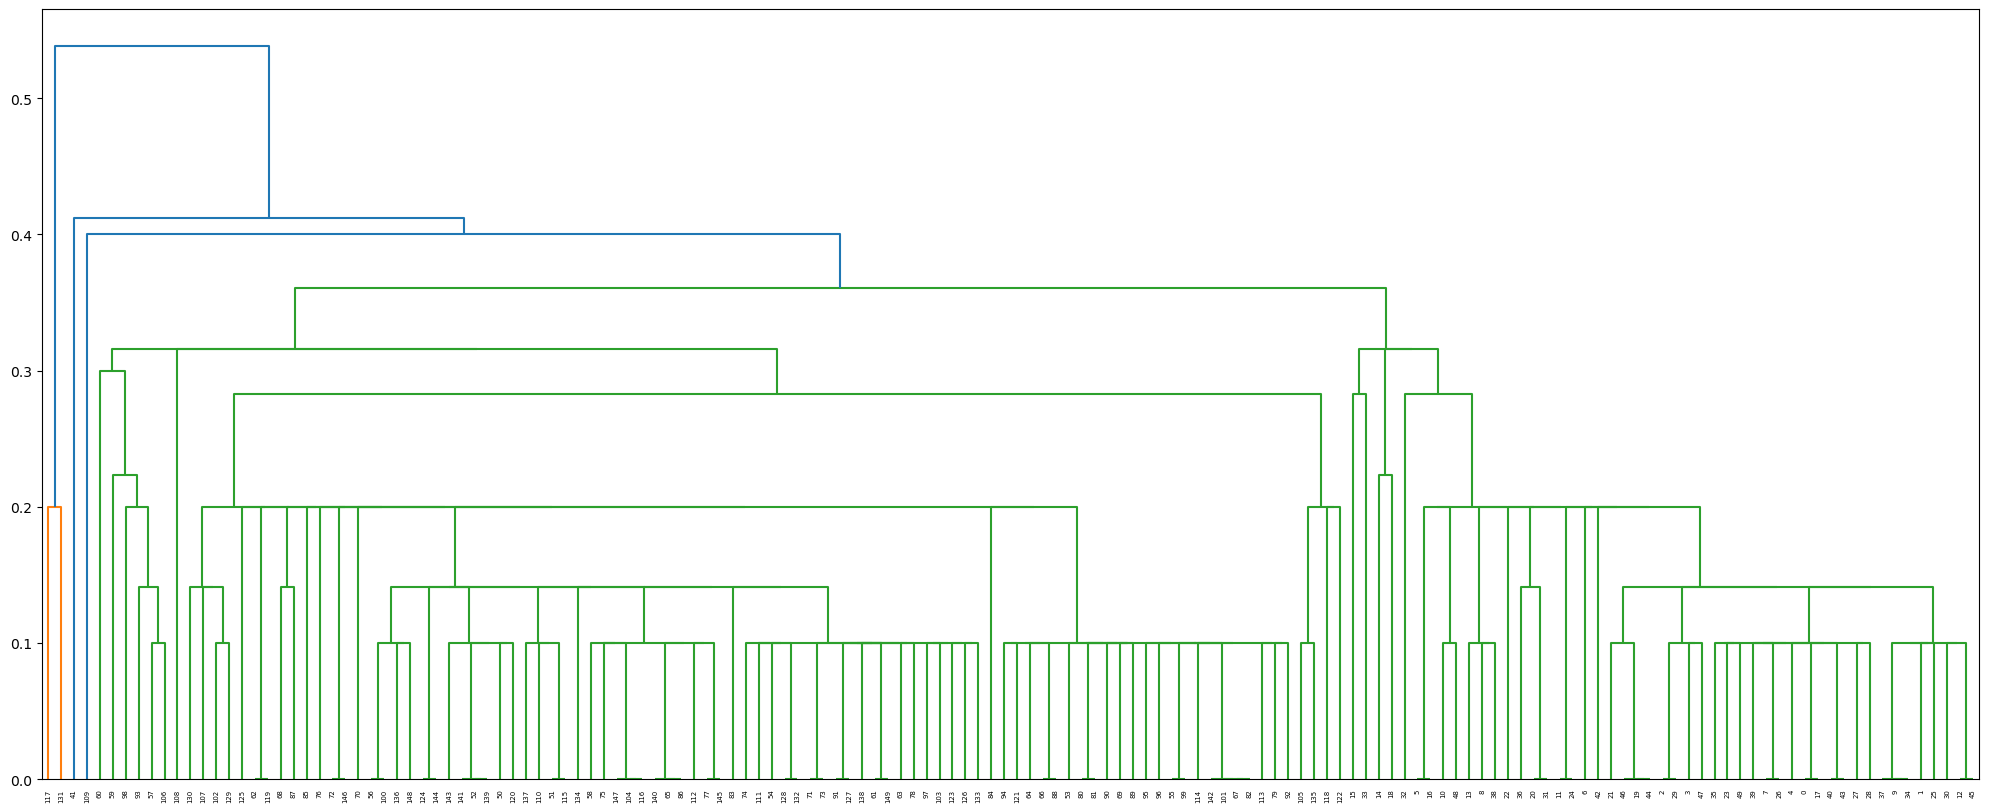

In [30]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

All three of these dendrograms roughly reflect what was observed in the original k-means clustering with k=3. In the dendrograms for the 'length_array' and 'petal_array', we can clearly observe the cluster that the k-means was able to filter out. This cluster corresponds to the 'blue' (Iris Setosa) group. The green portions in the dendrograms correspond to the large overlap between the 'red' (Iris Virginica) and 'green' (Iris Versicolor) groups from before. In the dendrogram, we can see all the overlap between both of these groups, and how they combine to form one large cluster. The 'sepal_array' on the otherhand largely reflects the large degree of overlapping between all three groups we observed in the k-means clustering before. The dendrogram reveals there is a lot more overlap than previously thought.